# Tut 2

**Anagram Detection:**

Generate a list of all possible strings using the
characters from s1 and then see if s2 occurs

In [1]:
def are_anagrams(s1, s2):
    # Check if lengths are different; if so, they can't be anagrams
    if len(s1) != len(s2):
        return False

    # Count the frequency of each character in both strings
    freq_s1 = {}
    freq_s2 = {}

    for char in s1:
        freq_s1[char] = freq_s1.get(char, 0) + 1

    for char in s2:
        freq_s2[char] = freq_s2.get(char, 0) + 1

    # Compare the frequency dictionaries
    return freq_s1 == freq_s2

# Example usage
s1 = "listen"
s2 = "silent"
print(are_anagrams(s1, s2))  # Output: True

s1 = "hello"
s2 = "world"
print(are_anagrams(s1, s2))  # Output: False


True
False


# Tut 3

**Get largest number possible from list of given numbers:**

In [2]:
from functools import cmp_to_key

# Custom comparator function
def compare(x, y):
    # Compare concatenated strings: x + y vs y + x
    if x + y > y + x:
        return -1  # x should come before y
    elif x + y < y + x:
        return 1   # y should come before x
    else:
        return 0   # They are equal in terms of concatenation

def maximum_salary(nums):
    # Convert all numbers to strings
    nums_str = list(map(str, nums))
    
    # Sort numbers using the custom comparator
    nums_str.sort(key=cmp_to_key(compare))
    
    # Join the sorted numbers to form the final result
    result = ''.join(nums_str)
    
    # If the result starts with '0', it means all numbers are 0
    if result[0] == '0':
        return '0'
    
    return result

# Sample Test Cases

# Test case 1
nums1 = [2, 12]
print(maximum_salary(nums1))  # Output: 221

# Test case 2
nums2 = [9, 46, 19]
print(maximum_salary(nums2))  # Output: 99641

# Test case 3
nums3 = [23, 92, 3]
print(maximum_salary(nums3))  # Output: 923923


212
94619
92323


**Car Fueling Problem**

In [3]:
def car_fueling(d, m, n, stops):
    # m = tank size
    # Add the destination city as the last stop
    stops = [0] + stops + [d]
    
    num_refills = 0
    current_pos = 0
    last_refill_pos = 0
    
    while current_pos < len(stops) - 1:
        # Try to reach the farthest stop within range
        last_refill_pos = current_pos
        while current_pos < len(stops) - 1 and stops[current_pos + 1] - stops[last_refill_pos] <= m:
            current_pos += 1
        
        # If we haven't moved, that means we can't reach the next stop
        if current_pos == last_refill_pos:
            return -1
        
        # If we haven't reached the destination yet, we need a refill
        if current_pos < len(stops) - 1:
            num_refills += 1
    
    return num_refills

# Sample Test Cases

# Test case 1: Expected output is 2
d1 = 950
m1 = 400
n1 = 4
stops1 = [200, 375, 550, 750]
print(car_fueling(d1, m1, n1, stops1))  # Output: 2

# Test case 2: Expected output is -1
d2 = 10
m2 = 3
n2 = 4
stops2 = [1, 2, 5, 9]
print(car_fueling(d2, m2, n2, stops2))  # Output: -1

# Test case 3: Expected output is 0
d3 = 200
m3 = 250
n3 = 2
stops3 = [100, 150]
print(car_fueling(d3, m3, n3, stops3))  # Output: 0

2
-1
0


**Fractional Knapsack**

In [4]:
def fractional_knapsack(n, W, items):
    #W knapscak capacity
    # items is a list of tuples where each tuple contains the cost and weight of an item
    
    # Calculate the value-to-weight ratio for each item
    ratios = [(c / w, c, w) for c, w in items]
    # Sort the items based on the ratio in descending order
    ratios.sort(reverse=True, key=lambda x: x[0])
    
    total_value = 0.0
    remaining_capacity = W
    
    for ratio, cost, weight in ratios:
        if remaining_capacity == 0:
            break
        
        # Take the full item if it fits in the remaining capacity
        if weight <= remaining_capacity:
            total_value += cost
            remaining_capacity -= weight
        else:
            # Take the fraction of the item that fits
            total_value += cost * (remaining_capacity / weight)
            remaining_capacity = 0
    
    return total_value

# Input: number of items n, capacity W, and the list of (cost, weight) pairs
n = 3  # Example for 3 items
W = 9  # Capacity of the backpack

# List of (cost, weight) for each item
items = [
    (5000, 4),  # Saffron: 5000 cost, 4 weight
    (200, 3),   # Vanilla: 200 cost, 3 weight
    (10, 5)     # Cinnamon: 10 cost, 5 weight
]

# Call the function and print the result
result = fractional_knapsack(n, W, items)
print(f"Maximum value of knapsack: {result:.2f}")


Maximum value of knapsack: 5204.00


# Tut 4

**Gene Alignment Problem**

In [6]:
#!/bin/python3
"""
Origin: https://www.geeksforgeeks.org/sequence-alignment-problem/
Converted from C++ solution to Python3

Algorithm type / application: Bioinformatics


Python Requirements:
	numpy

"""
import numpy as np

def get_minimum_penalty(x:str, y:str, pxy:int, pgap:int):
	"""
	Function to find out the minimum penalty

	:param x: pattern X
	:param y: pattern Y
	:param pxy: penalty of mis-matching the characters of X and Y
	:param pgap: penalty of a gap between pattern elements
	"""

	# initializing variables
	i = 0
	j = 0
	
	# pattern lengths
	m = len(x)
	n = len(y)
	
	# table for storing optimal substructure answers
	dp = np.zeros([m+1,n+1], dtype=int) #int dp[m+1][n+1] = {0};

	# initialising the table
	dp[0:(m+1),0] = [ i * pgap for i in range(m+1)]
	dp[0,0:(n+1)] = [ i * pgap for i in range(n+1)]

	# calculating the minimum penalty
	i = 1
	while i <= m:
		j = 1
		while j <= n:
			if x[i - 1] == y[j - 1]:
				dp[i][j] = dp[i - 1][j - 1]
			else:
				dp[i][j] = min(dp[i - 1][j - 1] + pxy,
								dp[i - 1][j] + pgap,
								dp[i][j - 1] + pgap)
			j += 1
		i += 1
	
	# Reconstructing the solution
	l = n + m # maximum possible length
	i = m
	j = n
	
	xpos = l
	ypos = l

	# Final answers for the respective strings
	xans = np.zeros(l+1, dtype=int)
	yans = np.zeros(l+1, dtype=int)
	

	while not (i == 0 or j == 0):
		#print(f"i: {i}, j: {j}")
		if x[i - 1] == y[j - 1]:	 
			xans[xpos] = ord(x[i - 1])
			yans[ypos] = ord(y[j - 1])
			xpos -= 1
			ypos -= 1
			i -= 1
			j -= 1
		elif (dp[i - 1][j - 1] + pxy) == dp[i][j]:
		
			xans[xpos] = ord(x[i - 1])
			yans[ypos] = ord(y[j - 1])
			xpos -= 1
			ypos -= 1
			i -= 1
			j -= 1
		
		elif (dp[i - 1][j] + pgap) == dp[i][j]:
			xans[xpos] = ord(x[i - 1])
			yans[ypos] = ord('_')
			xpos -= 1
			ypos -= 1
			i -= 1
		
		elif (dp[i][j - 1] + pgap) == dp[i][j]:	 
			xans[xpos] = ord('_')
			yans[ypos] = ord(y[j - 1])
			xpos -= 1
			ypos -= 1
			j -= 1
		

	while xpos > 0:
		if i > 0:
			i -= 1
			xans[xpos] = ord(x[i])
			xpos -= 1
		else:
			xans[xpos] = ord('_')
			xpos -= 1
	
	while ypos > 0:
		if j > 0:
			j -= 1
			yans[ypos] = ord(y[j])
			ypos -= 1
		else:
			yans[ypos] = ord('_')
			ypos -= 1

	# Since we have assumed the answer to be n+m long,
	# we need to remove the extra gaps in the starting
	# id represents the index from which the arrays
	# xans, yans are useful
	id = 1
	i = l
	while i >= 1:
		if (chr(yans[i]) == '_') and chr(xans[i]) == '_':
			id = i + 1
			break
		
		i -= 1

	# Printing the final answer
	print(f"Minimum Penalty in aligning the genes = {dp[m][n]}")
	print("The aligned genes are:") 
	# X
	i = id
	x_seq = ""
	while i <= l:
		x_seq += chr(xans[i])
		i += 1
	print(f"X seq: {x_seq}")

	# Y
	i = id
	y_seq = ""
	while i <= l:
		y_seq += chr(yans[i])
		i += 1
	print(f"Y seq: {y_seq}")

def test_get_minimum_penalty():
	"""
	Test the get_minimum_penalty function
	"""
	# input strings
	gene1 = "AGGGCT"
	gene2 = "AGGCA"
	
	# initialising penalties of different types
	mismatch_penalty = 3
	gap_penalty = 2

	# calling the function to calculate the result
	get_minimum_penalty(gene1, gene2, mismatch_penalty, gap_penalty)

test_get_minimum_penalty()

# This code is contributed by wilderchirstopher.


Minimum Penalty in aligning the genes = 5
The aligned genes are:
X seq: AGGGCT
Y seq: A_GGCA


**Knapsack**

In [5]:
# Returns the maximum value that
# can be put in a knapsack of capacity W
def knapSack(W, wt, val):
    n = len(wt)
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Build table dp[][] in bottom-up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                dp[i][w] = 0
            elif wt[i - 1] <= w:
                dp[i][w] = max(val[i - 1] + dp[i - 1][w - wt[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp[n][W]

# Driver Code
profit = [60, 100, 120]
weight = [10, 20, 30]
W = 50

print(knapSack(W, weight, profit))

220


# Tut 5

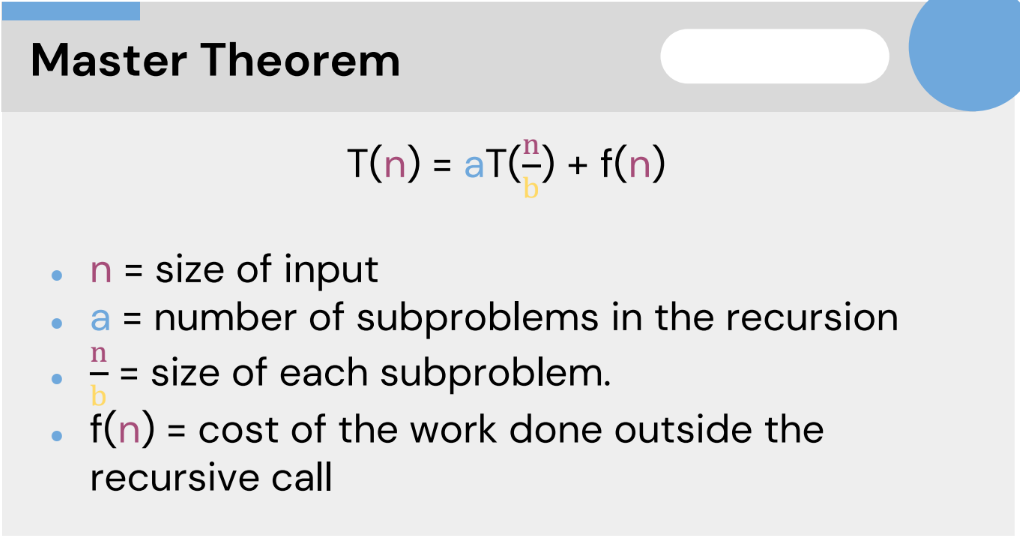
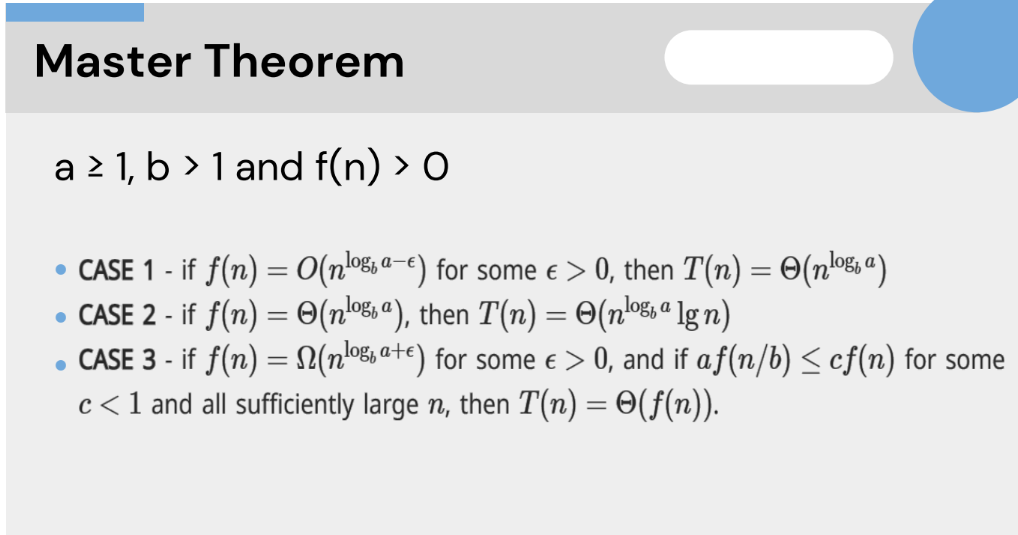

**5 3 8 9 1 7 0 2**

● Use Selection sort

● Use Merge sort

● Use Quick sort using pivot at 5

In [5]:
# Input List
arr = [5, 3, 8, 9, 1, 7, 0, 2]

# Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Quick Sort (Pivot = 5)
def quick_sort(arr, pivot_index):
    if len(arr) <= 1:
        return arr


    # if pivot not selected
    # pivot_index = len(arr) // 2
    # Use the provided pivot index
    pivot = arr[pivot_index]

    # Partition the array
    less = [x for i, x in enumerate(arr) if x <= pivot and i != pivot_index]
    greater = [x for i, x in enumerate(arr) if x > pivot]

    # Recursively sort the partitions
    return quick_sort(less, 0) + [pivot] + quick_sort(greater, 0)
# Static pivot selector (e.g., choose the first element as pivot)
def pivot_index(arr, pivot):
    for i in range(len(arr)):
        if arr[i] == pivot:
            return i

# Input List
arr = [5, 3, 8, 9, 1, 7, 0, 2]
original_arr = arr[:]


# Run Sorting Algorithms
original_arr = arr[:]  # Preserve the original array

# Selection Sort
selection_sorted = selection_sort(original_arr[:])
print("Selection Sort:", selection_sorted)

# Merge Sort
merge_sorted = merge_sort(original_arr[:])
print("Merge Sort:", merge_sorted)

# Quick Sort (Pivot = 5)
quick_sorted = quick_sort(original_arr[:], pivot_index(original_arr, 5))
print("Quick Sort (Pivot = 5):", quick_sorted)


Selection Sort: [0, 1, 2, 3, 5, 7, 8, 9]
Merge Sort: [0, 1, 2, 3, 5, 7, 8, 9]
Quick Sort (Pivot = 5): [0, 1, 2, 3, 5, 7, 8, 9]


# Tut 6

**Activity Selection Problem**

In [7]:
''' Python program for activity selection problem
 when input activities may not be sorted.'''


def MaxActivities(arr, n):
    selected = []

    # Sort jobs according to finish time
    Activity.sort(key=lambda x: x[1])

    # The first activity always gets selected
    i = 0
    selected.append(arr[i])

    for j in range(1, n):

        '''If this activity has start time greater than or
           equal to the finish time of previously selected
           activity, then select it'''
        if arr[j][0] >= arr[i][1]:
            selected.append(arr[j])
            i = j
    return selected


# Driver code
if __name__ == '__main__':
    Activity = [[5, 9], [1, 2], [3, 4], [0, 6], [5, 7], [8, 9]]
    n = len(Activity)

    # Function call
    selected = MaxActivities(Activity, n)
    print("Following activities are selected :")
    print(selected[0], end = "");
    for i in range (1, len(selected)):
        print(",", end = " ")
        print(selected[i], end = "")

# This code is contributed by kshitijjainm

Following activities are selected :
[1, 2], [3, 4], [5, 7], [8, 9]

**Max Value for an Expression**

In [8]:
def evaluate(a, b, op):
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    elif op == '*':
        return a * b

def maximize_expression(digits, operations):
    n = len(digits)
    dp_max = [[0] * n for _ in range(n)]
    dp_min = [[0] * n for _ in range(n)]

    # Base case: single digits
    for i in range(n):
        dp_max[i][i] = digits[i]
        dp_min[i][i] = digits[i]

    # Fill DP tables
    for length in range(1, n):  # length of the subexpression
        for i in range(n - length):
            j = i + length
            dp_max[i][j] = float('-inf')
            dp_min[i][j] = float('inf')
            for k in range(i, j):  # split point
                op = operations[k]
                a = evaluate(dp_max[i][k], dp_max[k+1][j], op)
                b = evaluate(dp_max[i][k], dp_min[k+1][j], op)
                c = evaluate(dp_min[i][k], dp_max[k+1][j], op)
                d = evaluate(dp_min[i][k], dp_min[k+1][j], op)
                dp_max[i][j] = max(dp_max[i][j], a, b, c, d)
                dp_min[i][j] = min(dp_min[i][j], a, b, c, d)

    return dp_max[0][n-1]

# Example usage
digits = [5, 8, 7, 4, 8, 9]
operations = ['-', '+', '*', '-', '+']
result = maximize_expression(digits, operations)
print("Maximum value of the expression:", result)


Maximum value of the expression: 200


# Tut 7

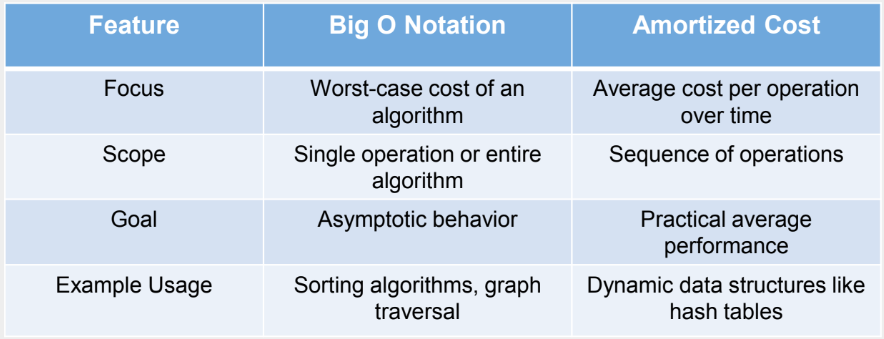
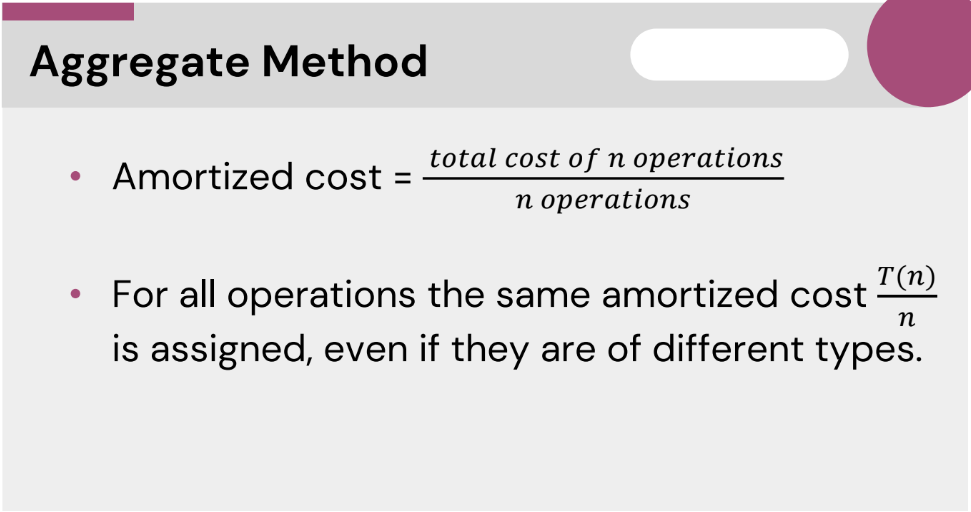

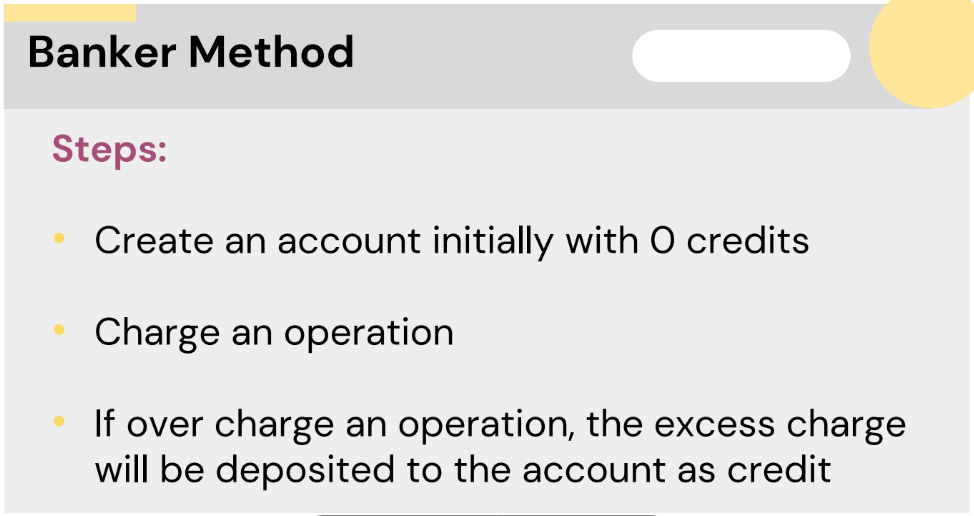
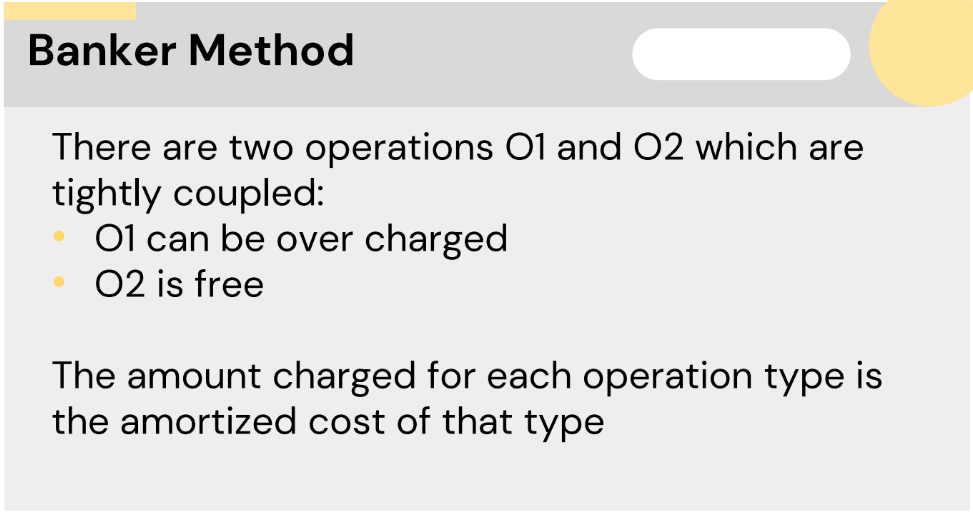

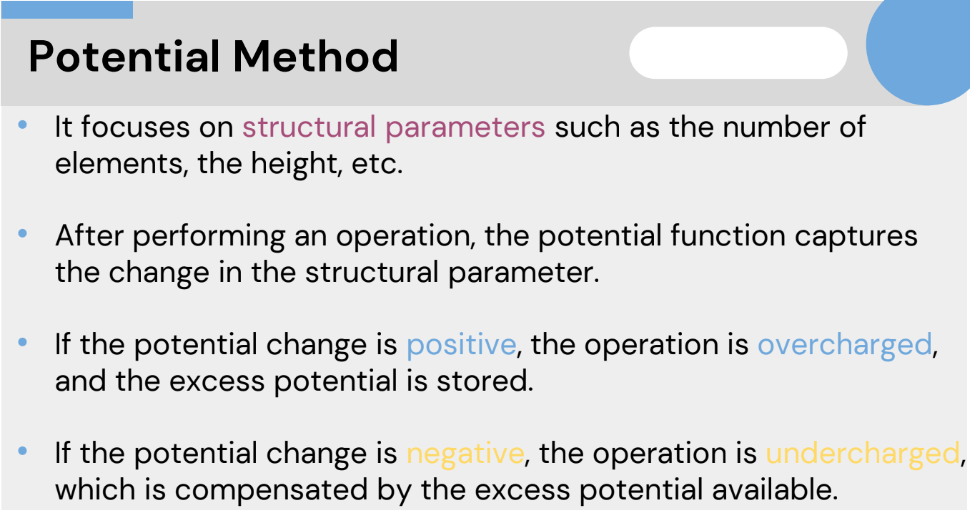
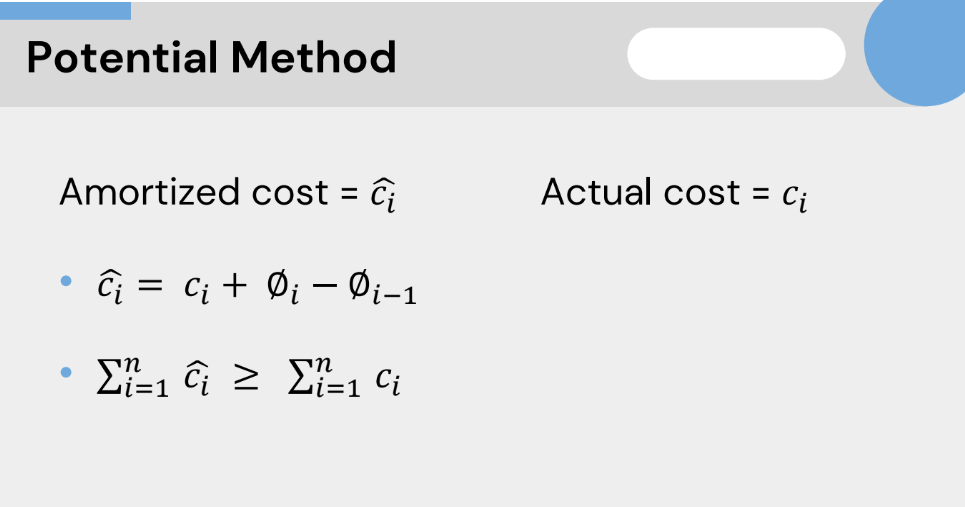

**Stack Operations**

Get the amortized cost using 3 methods

• Let Y = (O1,......, Oy) be a sequence of operations
performed on a stack such that each Oi
is

push/pop

• y = number of operations




### **1. Aggregate Analysis**

This method computes the total cost of performing \(y\) operations and divides it by \(y\), giving the amortized cost.

#### **Push Operation**
- **Cost:** A push operation inserts an element into the stack, which is an \(O(1)\) operation.

#### **Pop Operation**
- **Cost:** A pop operation removes an element from the stack, which is also an \(O(1)\) operation.

#### **Sequence of \(y\) Operations**
Let \(m\) be the number of push operations and \(n\) be the number of pop operations such that \(m + n = y\):
- Total cost = \(O(1) \times m + O(1) \times n = O(y)\)
- Amortized cost per operation = \(\frac{\text{Total cost}}{\text{Total operations}} = \frac{O(y)}{y} = O(1)\).

---

### **2. Accounting Method**

This method assigns a cost (or "credit") to each operation, ensuring the credits cover expensive operations over time.

#### **Credits:**
- **Push Operation:** Assign a cost of \(2\) credits.
  - \(1\) credit pays for the actual push.
  - \(1\) credit is "saved" in case the element is popped later.
- **Pop Operation:** Uses \(1\) credit (already "saved" by a previous push).

#### **Cost Analysis**
- **Push:** Each push costs \(2\), but \(1\) credit is saved for future pops.
- **Pop:** Each pop uses \(1\) saved credit, so its cost is effectively \(0\) (amortized).

For \(y\) operations:
- Total cost = \(2 \times m + 0 \times n = O(2m)\), where \(m \leq y\).
- Amortized cost = \(\frac{O(2m)}{y} = O(1)\).

---

### **3. Potential Method**

This method uses a "potential function" to measure the "stored energy" (or credits) of the data structure, which accounts for future costs.

#### **Potential Function:**
Let \(S\) be the size of the stack after \(i\)-th operation:
- \(\Phi(S) = \text{size of the stack}\)
- Initial potential: \(\Phi_0 = 0\)

#### **Cost Analysis:**
1. **Push Operation:**
   - Actual cost = \(1\)
   - Change in potential: \(\Delta \Phi = 1\) (stack size increases by 1).
   - Total amortized cost = Actual cost + \(\Delta \Phi = 1 + 1 = 2\).

2. **Pop Operation:**
   - Actual cost = \(1\)
   - Change in potential: \(\Delta \Phi = -1\) (stack size decreases by 1).
   - Total amortized cost = Actual cost + \(\Delta \Phi = 1 - 1 = 0\).

For \(y\) operations:
- Amortized cost per operation = \(\frac{\text{Total amortized cost}}{y} = O(1)\).

---

### **Conclusion**
Using all three methods (**aggregate analysis**, **accounting**, and **potential**):
- The amortized cost of **push** and **pop** operations on a stack is \(O(1)\).